<a href="https://colab.research.google.com/github/Griffin-Jordan/StormStocks/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime

In [ ]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
twitter_data = pd.read_csv("/content/stock_tweets.csv")

In [ ]:
twitter_data.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:

tweets = []

text = twitter_data["Tweet"]
text.head()

0    Mainstream media has done an amazing job at br...
1    Tesla delivery estimates are at around 364k fr...
2    3/ Even if I include 63.0M unvested RSUs as of...
3    @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4    @RealDanODowd @Tesla Stop trying to kill kids,...
Name: Tweet, dtype: object

In [ ]:


# Create an instance of the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to extract the sentiment score for each tweet
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the "Tweet" column
twitter_data['Sentiment Score'] = twitter_data['Tweet'].apply(get_sentiment_score)



In [ ]:
twitter_data

,Date,Tweet,Stock Name,Company Name,Sentiment Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.5423


In [ ]:
# Filter the dataframe by the "Stock Name" column
stock_df = twitter_data.groupby('Stock Name').mean()

# Print the mean sentiment score for each stock
print(stock_df['Sentiment Score'])


Stock Name
AAPL    0.144701
AMD     0.283421
AMZN    0.203925
BA      0.179305
BX      0.331684
COST    0.179517
CRM     0.223813
DIS     0.144843
ENPH    0.313510
F       0.121210
GOOG    0.217308
INTC    0.180221
KO      0.213736
META    0.158099
MSFT    0.203925
NFLX    0.110818
NIO     0.244442
NOC     0.121210
PG      0.203925
PYPL    0.198116
TSLA    0.175951
TSM     0.221852
VZ      0.282993
XPEV    0.277622
ZS      0.293922
Name: Sentiment Score, dtype: float64


<ipython-input-32-fff73307f0fc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_df = twitter_data.groupby('Stock Name').mean()


In [ ]:
twitter_data.head()

,Date,Tweet,Stock Name,Company Name,Sentiment Score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750


In [ ]:
twitterWithScores = twitter_data

In [ ]:


twitterWithScores['Date'] = pd.to_datetime(twitterWithScores['Date'])
twitterWithScores['Date'] = twitterWithScores['Date'].dt.date
twitterWithScores

,Date,Tweet,Stock Name,Company Name,Sentiment Score
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...
80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779
80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818
80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215
80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.5423


In [ ]:

positive = twitterWithScores[twitterWithScores["Sentiment Score"] > .5]
positive.head(15)

,Date,Tweet,Stock Name,Company Name,Sentiment Score
11,2022-09-29,Powerwall FTW! https://t.co/GWAaXXCrYv,TSLA,"Tesla, Inc.",0.6155
21,2022-09-29,“New York state plans to adopt California's ru...,TSLA,"Tesla, Inc.",0.5423
24,2022-09-29,Time for me to wrap up things for next 10 days...,TSLA,"Tesla, Inc.",0.7650
35,2022-09-29,Friendly reminder to the $TSLA holders: As the...,TSLA,"Tesla, Inc.",0.7964
36,2022-09-29,$TSLA along a few others the only interesting ...,TSLA,"Tesla, Inc.",0.8957
37,2022-09-29,@vap1337 @Tesla All I see is a free Tesla,TSLA,"Tesla, Inc.",0.5106
38,2022-09-29,@TeslaSolar roof stood up to #HurricaneIan wit...,TSLA,"Tesla, Inc.",0.6696
40,2022-09-29,@TeslaSolar roof stood up to #HurricaneIan wit...,TSLA,"Tesla, Inc.",0.6696
45,2022-09-29,"@klwtts @Tesla @elonmusk Hey @elonmusk, Tesla ...",TSLA,"Tesla, Inc.",0.8957
47,2022-09-29,(Reuters) - New York state plans to adopt Cali...,TSLA,"Tesla, Inc.",0.5423


In [ ]:
text = positive["Tweet"]
text.head(20)

11               Powerwall FTW! https://t.co/GWAaXXCrYv
21    “New York state plans to adopt California's ru...
24    Time for me to wrap up things for next 10 days...
35    Friendly reminder to the $TSLA holders: As the...
36    $TSLA along a few others the only interesting ...
37            @vap1337 @Tesla All I see is a free Tesla
38    @TeslaSolar roof stood up to #HurricaneIan wit...
40    @TeslaSolar roof stood up to #HurricaneIan wit...
45    @klwtts @Tesla @elonmusk Hey @elonmusk, Tesla ...
47    (Reuters) - New York state plans to adopt Cali...
55     Took the $274.24 for the quick $6,000 win. $TSLA
56    Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...
58    This supports my comments yesterday that full-...
59    I guess all the hyperbulls that had $TSLA disr...
60    Translation:\n\n$TSLA doesn't have jack shit, ...
64    Guilty of overtrading in this aggressive price...
72    Jobless claims coming up in 2 min. Would love ...
77    Happy Thursday. The hurricane passed over 

In [ ]:
noc = twitterWithScores[twitterWithScores['Stock Name'] == "NOC"]
noc

,Date,Tweet,Stock Name,Company Name,Sentiment Score
76264,2022-09-08,"Today's noteworthy breakouts, moves, and setup...",NOC,Northrop Grumman Corporation,0.0000
76265,2022-08-19,"Since the Ukranian war, Northrop Grumman Corpo...",NOC,Northrop Grumman Corporation,-0.5994
76266,2022-08-17,Averages are pulling back from logical supply ...,NOC,Northrop Grumman Corporation,0.6486
76267,2022-07-27,#earnings before the open tomorrow \n\nsorry t...,NOC,Northrop Grumman Corporation,-0.0772
76268,2022-07-01,"Northrop, $NOC, and Raytheon, $RTX, won defens...",NOC,Northrop Grumman Corporation,0.6369
76269,2022-06-30,"Stick with the war criminals, good stocks!\n$L...",NOC,Northrop Grumman Corporation,-0.7177
76270,2022-06-28,"Northrop, $NOC, and Raytheon, $RTX, won defens...",NOC,Northrop Grumman Corporation,0.6369
76271,2022-05-26,This boomer ( $LMT $V $MA $BRK $MO $BTI $PM $N...,NOC,Northrop Grumman Corporation,-0.6249
76272,2022-05-09,Industry consolidating and demand to increase....,NOC,Northrop Grumman Corporation,0.5574
76273,2022-05-05,Absurd level of selling of great companies ove...,NOC,Northrop Grumman Corporation,0.6249


In [ ]:
analyzer.lexicon.update({
    'conflict': 1.5,
    'violence': -1.5,
    'war': 2.0,
    'resolution': 1.5,
    'peacekeeping': 1.5,
})

# add negative words related to war
analyzer.lexicon.update({
    'atrocity': -2.0,
    'casualty': -1.5,
    'death': -2.0,
    'genocide': -2.5,
    'terrorism': -2.0,
})

textWar = "Since the Ukrainian war, Northrop Grumman Corporation, $NOC, has hit all-time highs, up 27%."
scores = analyzer.polarity_scores(textWar)["compound"]
scores

0.4588

In [ ]:
from google.colab import files
twitter_data.to_csv('twitterWithScores2.csv')
files.download('twitterWithScores2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
stock_df.to_csv('stock_sentiment_data.csv')
files.download('stock_sentiment_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Frequency'>

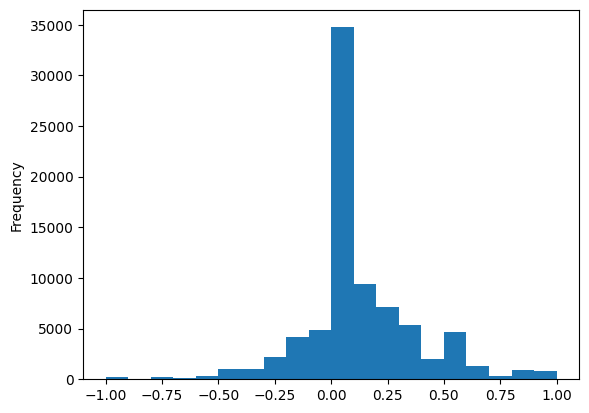

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
df = twitter_data

# Define a function to get the sentiment polarity score of each tweet
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

# Apply the sentiment function to each tweet in the dataset
df['sentiment(blob)'] = df['Tweet'].apply(get_sentiment)

# Visualize the distribution of sentiment scores
df['sentiment(blob)'].plot.hist(bins=20)

In [ ]:
df

,Date,Tweet,Stock Name,Company Name,Sentiment Score,sentiment(blob)
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.600000
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.000000
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.018182
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,0.079167
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,-0.200000
...,...,...,...,...,...,...
80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.1779,0.000000
80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.3818,0.111111
80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.4215,0.000000
80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.5423,0.107143
